<a href="https://colab.research.google.com/github/FinNijatTech/Master-Thesis-Project/blob/main/Master_Thesis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
df = pd.read_excel("/content/Master_Thesis_Data Experiment Data Cutting without crisis.xlsx")
df

,Country,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,DE,1970-Q1,0,NaN,31.535927,-1.595662,2.894135,9.536667,-1.991301,NaN,7.833333,NaN,10.873150
1,DE,1970-Q2,0,NaN,32.363393,3.975818,3.335860,9.890000,8.214446,NaN,8.400000,NaN,9.807037
2,DE,1970-Q3,0,NaN,33.204478,1.867836,3.566009,9.370000,5.363654,NaN,8.533334,NaN,9.271091
3,DE,1970-Q4,0,85.6,34.062502,0.847607,4.000000,8.830000,-0.028774,NaN,8.500000,NaN,8.835394
4,DE,1971-Q1,0,85.8,34.907015,-1.921103,4.441154,7.476666,-1.492452,NaN,7.766667,NaN,9.699077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,CA,2018-Q4,0,216.2,129.660633,0.340870,2.035623,2.112573,-1.296769,-2.919957,2.318050,5.700000,104.797200
2796,CA,2019-Q1,0,217.0,129.556938,0.070759,1.611685,1.997995,1.606348,-3.080937,1.857795,5.800000,109.103100
2797,CA,2019-Q2,0,219.3,128.061840,0.988110,2.148389,1.859268,0.004727,-1.128215,1.616548,5.566667,114.186500
2798,CA,2019-Q3,0,221.0,129.734163,0.374027,1.939334,1.837570,2.206205,-2.178369,1.362776,5.733333,114.896600


In [36]:
df.ffill(inplace=True) # filling NA values
df.bfill(inplace=True) # filling NA values
df

,Country,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,DE,1970-Q1,0,85.6,31.535927,-1.595662,2.894135,9.536667,-1.991301,-2.066498,7.833333,5.233333,10.873150
1,DE,1970-Q2,0,85.6,32.363393,3.975818,3.335860,9.890000,8.214446,-2.066498,8.400000,5.233333,9.807037
2,DE,1970-Q3,0,85.6,33.204478,1.867836,3.566009,9.370000,5.363654,-2.066498,8.533334,5.233333,9.271091
3,DE,1970-Q4,0,85.6,34.062502,0.847607,4.000000,8.830000,-0.028774,-2.066498,8.500000,5.233333,8.835394
4,DE,1971-Q1,0,85.8,34.907015,-1.921103,4.441154,7.476666,-1.492452,-2.066498,7.766667,5.233333,9.699077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,CA,2018-Q4,0,216.2,129.660633,0.340870,2.035623,2.112573,-1.296769,-2.919957,2.318050,5.700000,104.797200
2796,CA,2019-Q1,0,217.0,129.556938,0.070759,1.611685,1.997995,1.606348,-3.080937,1.857795,5.800000,109.103100
2797,CA,2019-Q2,0,219.3,128.061840,0.988110,2.148389,1.859268,0.004727,-1.128215,1.616548,5.566667,114.186500
2798,CA,2019-Q3,0,221.0,129.734163,0.374027,1.939334,1.837570,2.206205,-2.178369,1.362776,5.733333,114.896600


In [37]:
df.isna().sum() #checking number of NA values

Country                                 0
Date                                    0
Dependent Variable                      0
Credit to GDP                           0
Housing price                           0
GDP growth                              0
Inflation                               0
3 month money market rate               0
Gross fixed capital formation to GDP    0
Account to GDP                          0
10 Year Government Bond Rate            0
Unemployment                            0
Share Price                             0
dtype: int64

In [38]:
df.describe() #statistical info

,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,0.083571,165.396179,60.778329,0.621146,4.539842,4.055801,0.898217,0.172039,4.971079,6.714202,55.560765
std,0.276793,69.617261,40.286216,1.169051,4.863750,4.603218,9.755465,9.690886,4.080053,2.976938,43.561762
min,0.000000,57.400000,1.997250,-6.477614,-6.127770,-0.776667,-71.243918,-44.261600,-0.544038,1.066667,0.680120
25%,0.000000,116.200000,25.021958,0.081257,1.518316,0.083333,-0.926134,-1.611249,1.393333,4.600000,13.434220
50%,0.000000,147.300000,55.772040,0.622945,2.711994,2.683100,0.603012,1.136262,4.381666,6.400000,48.667965
75%,0.000000,192.400000,97.020855,1.144081,6.132007,6.496573,2.214237,4.204658,7.934792,8.375000,92.550100
max,1.000000,348.200000,174.705745,21.112074,46.239230,24.000000,291.955444,20.056750,19.338870,18.100000,191.563700


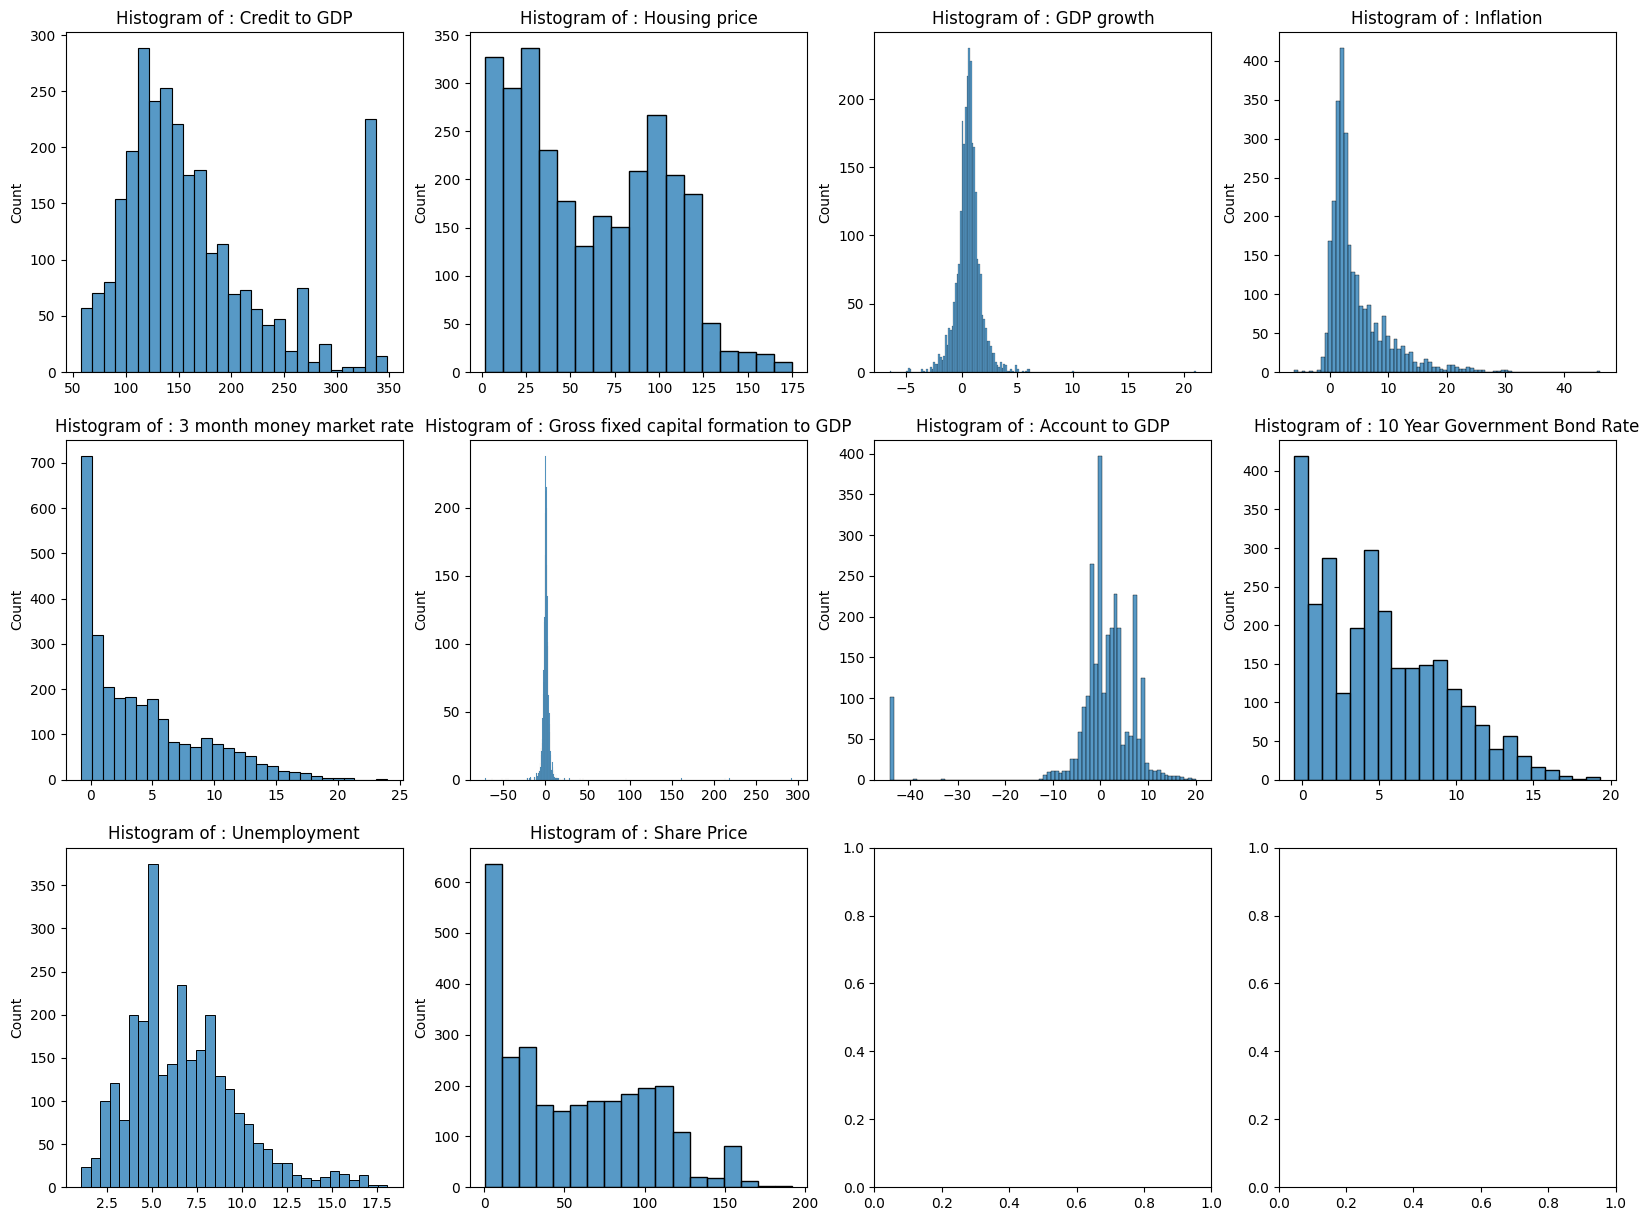

In [39]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
for i, ax in zip(df.columns[3:], axes.flat):
    sns.histplot(x=df[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

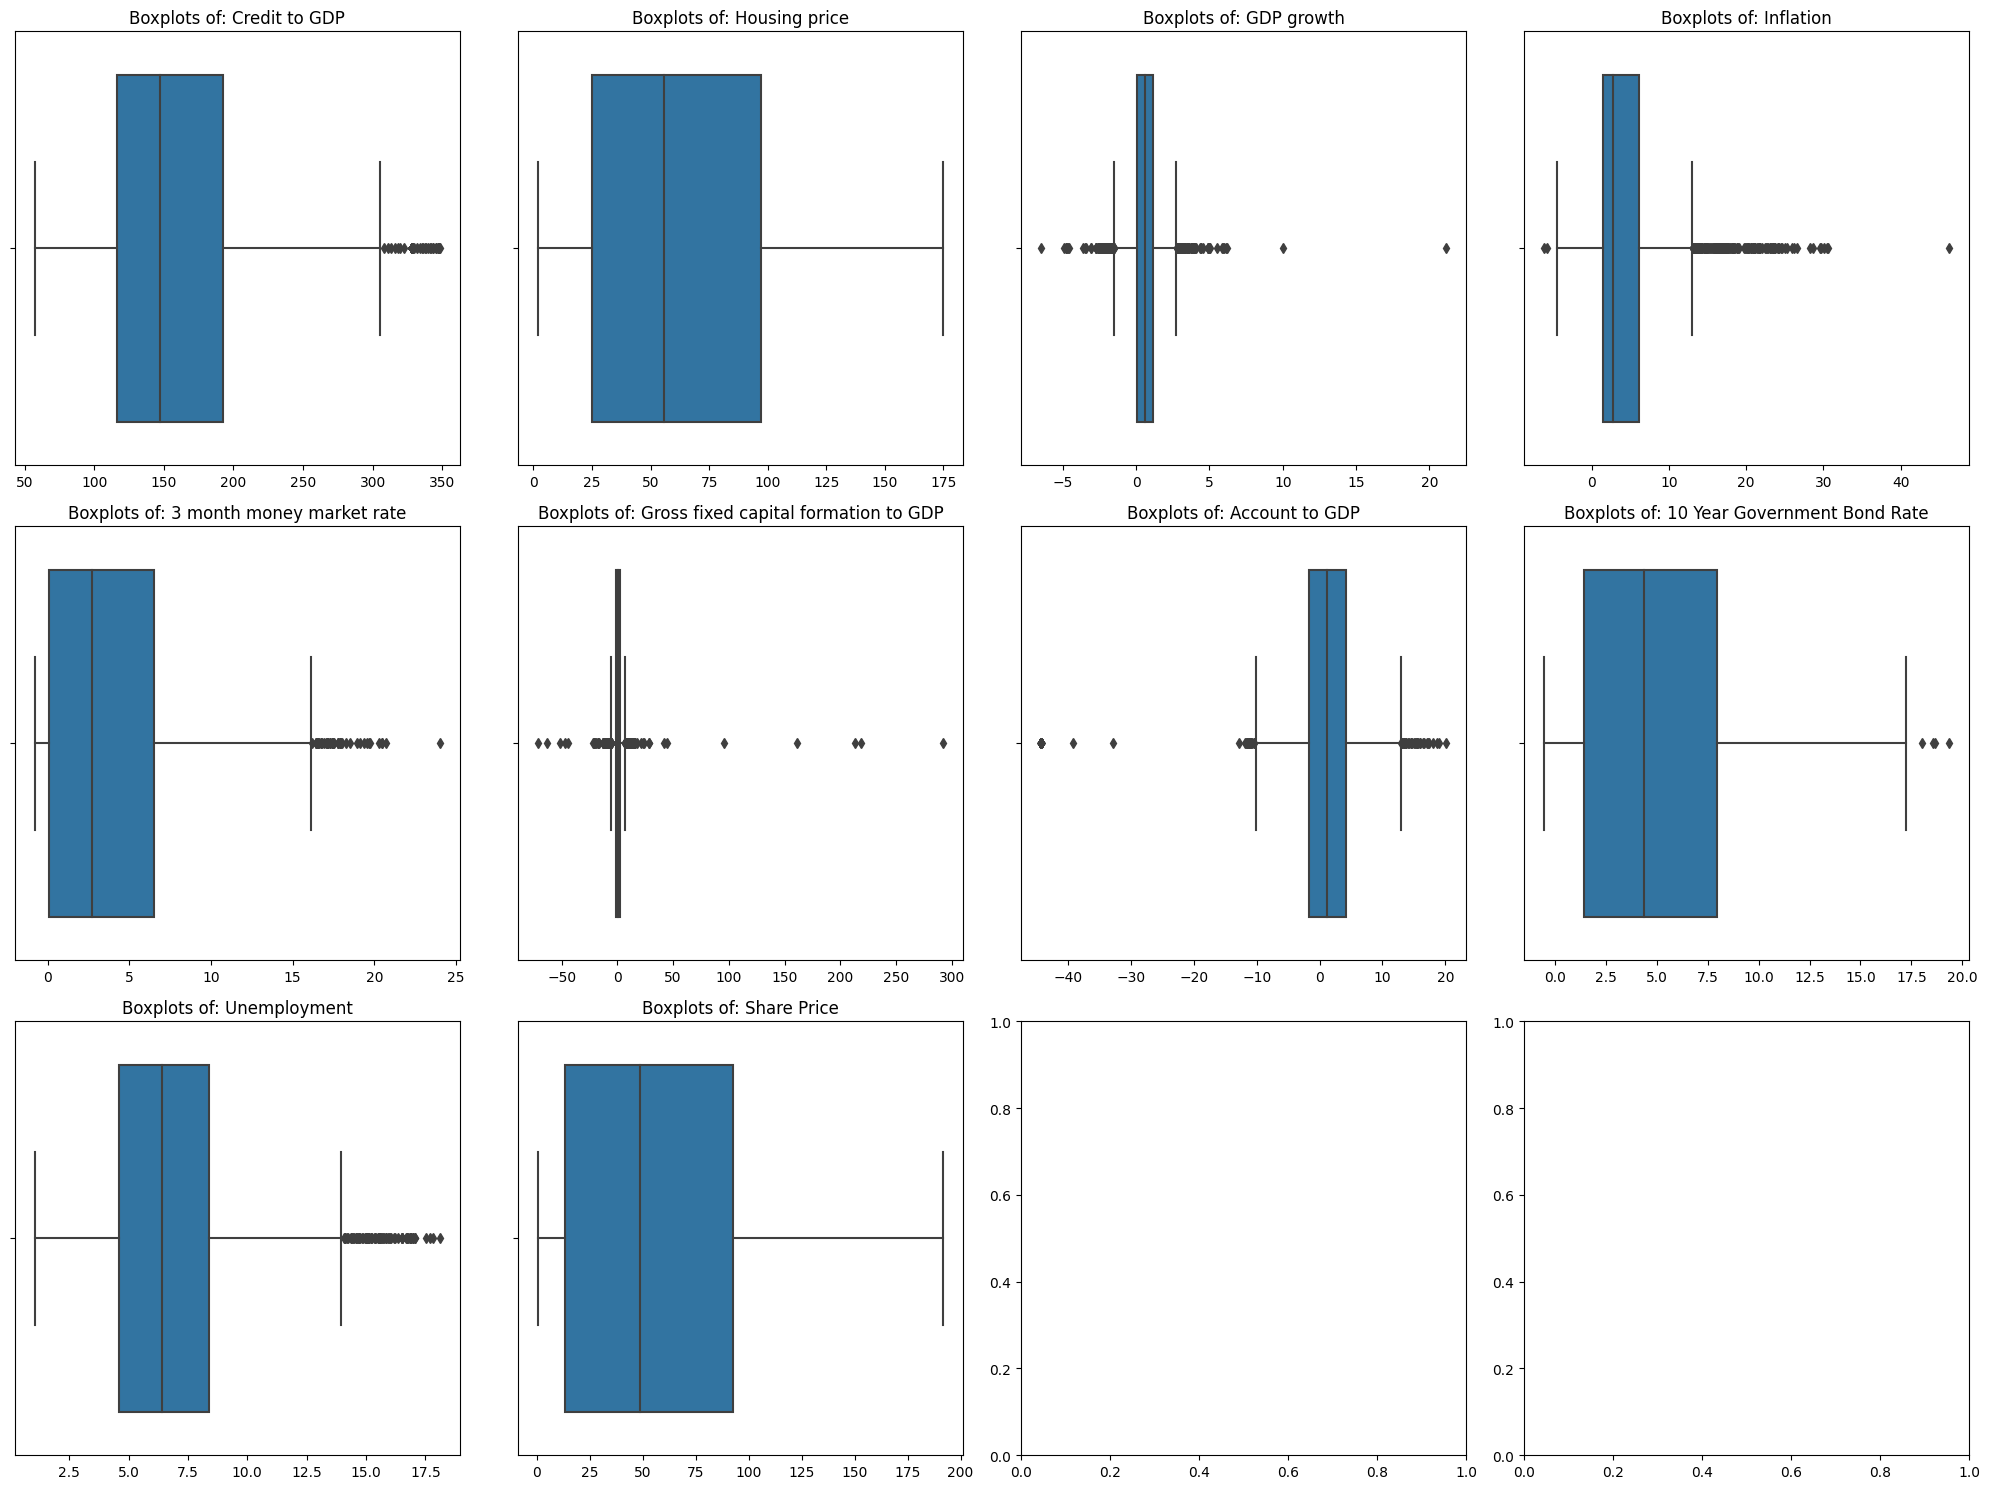

In [40]:
numeric_columns = df.select_dtypes(include='number')

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))

for i, ax in zip(numeric_columns.columns[1:], axes.flat):
    sns.boxplot(x=numeric_columns[i], ax=ax, orient='h')
    ax.set(title=f"Boxplots of: {i}", xlabel="")

plt.tight_layout()
plt.show()

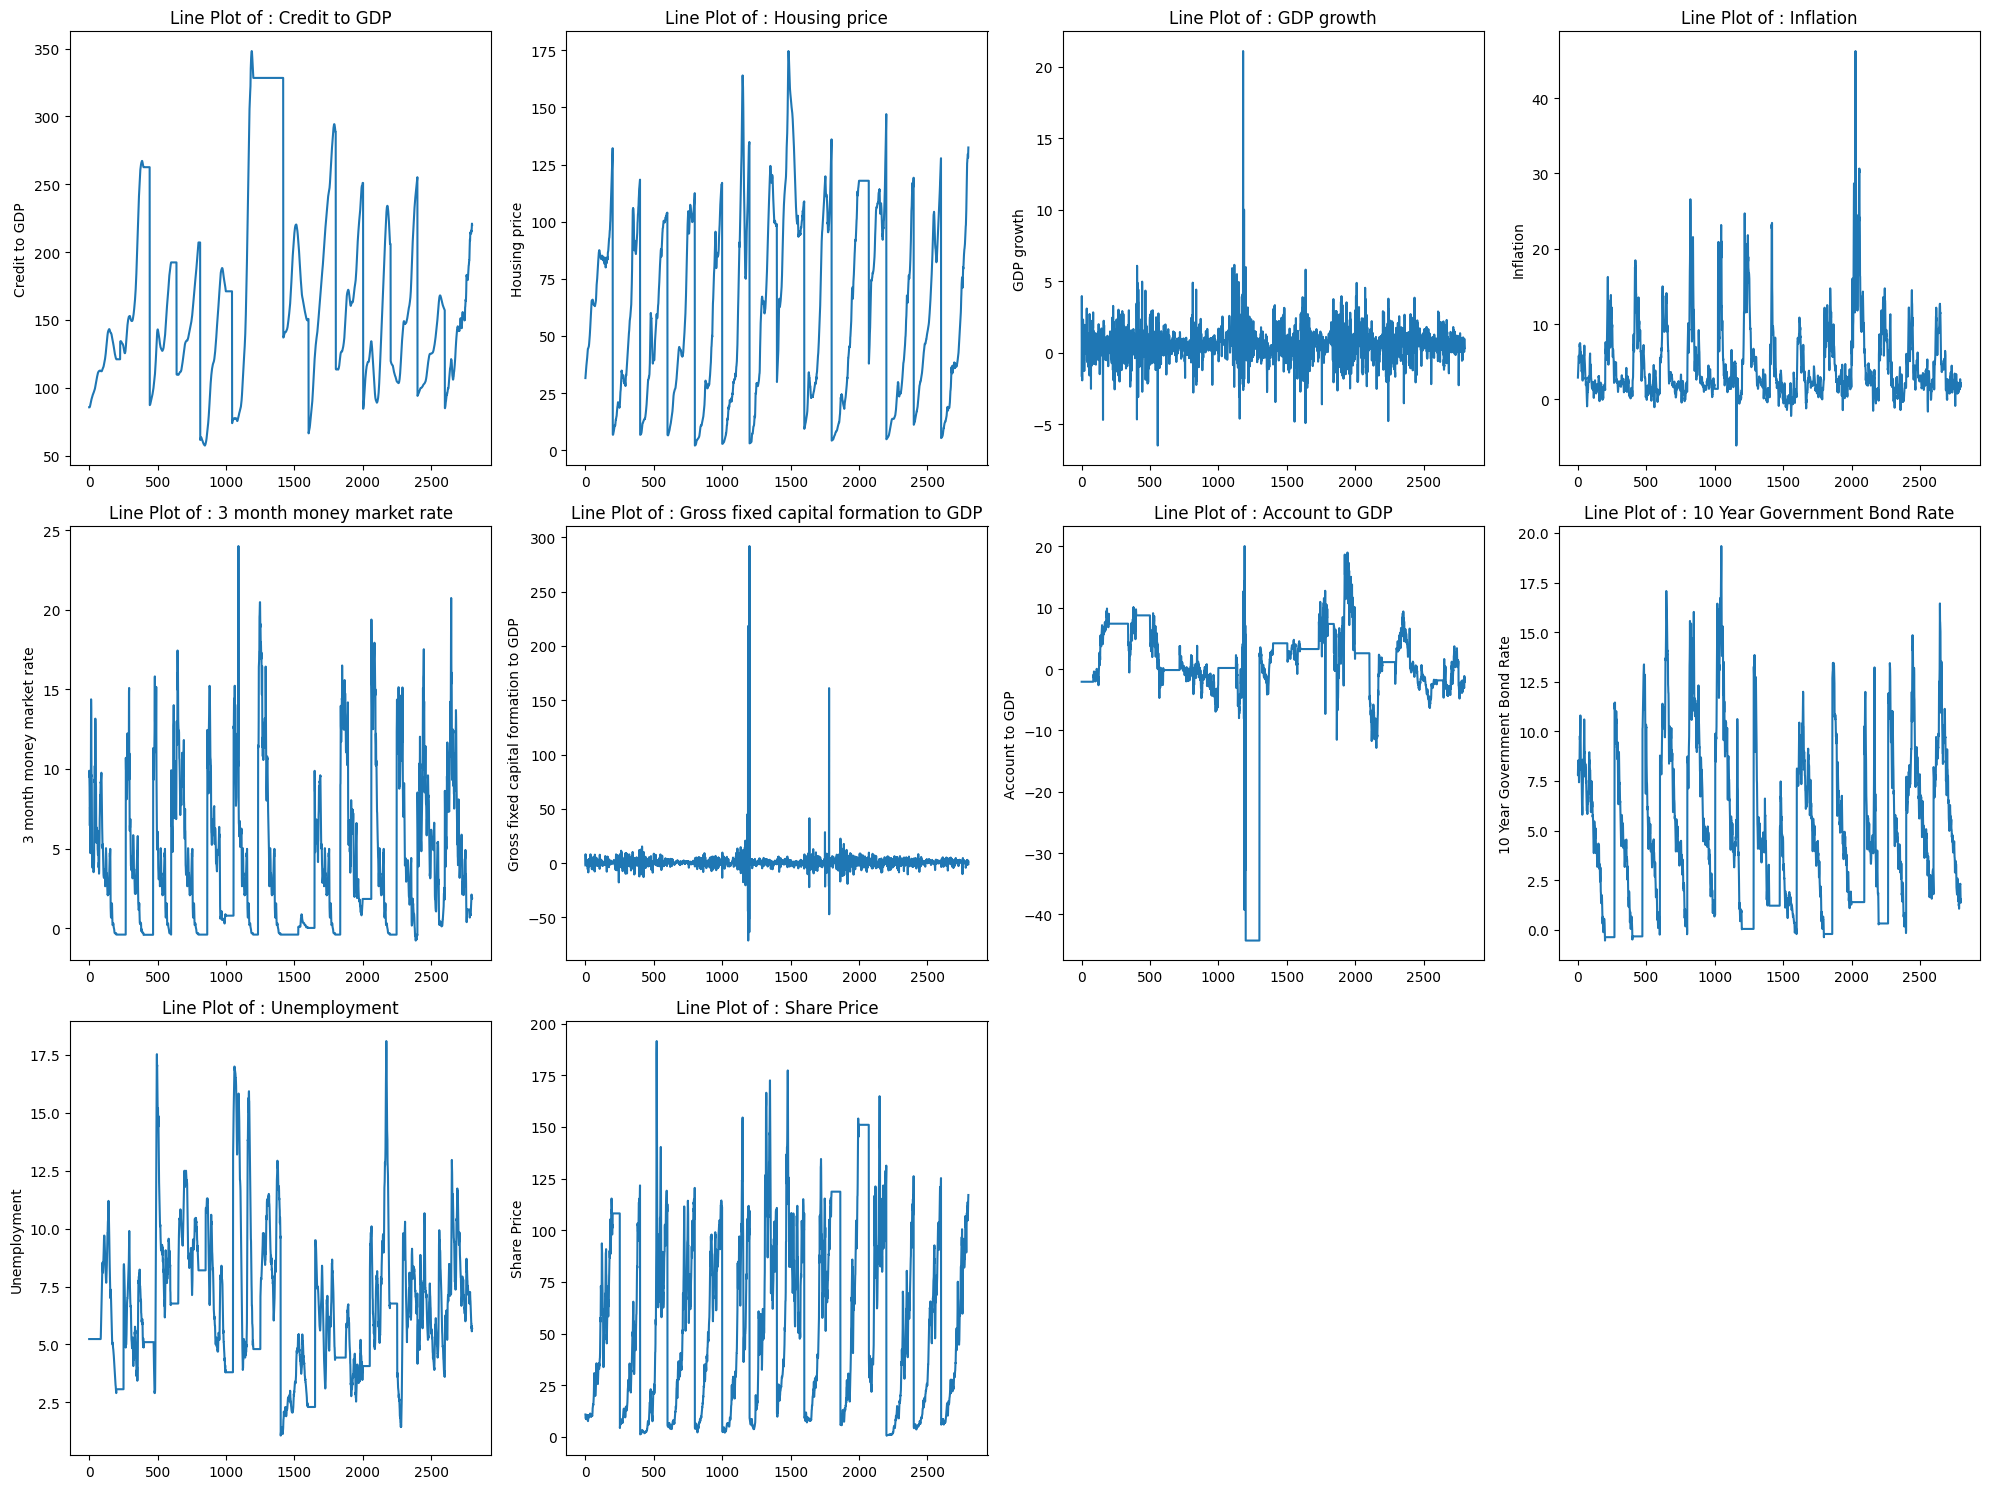

In [41]:
num_variables = len(df.columns) - 3
num_plots = min(10, num_variables)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 15))

for i, ax in zip(df.columns[3:], axes.flat):
    sns.lineplot(data=df, x=df.index, y=df[i], ax=ax)
    ax.set(title=f"Line Plot of : {i}", xlabel="")

for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

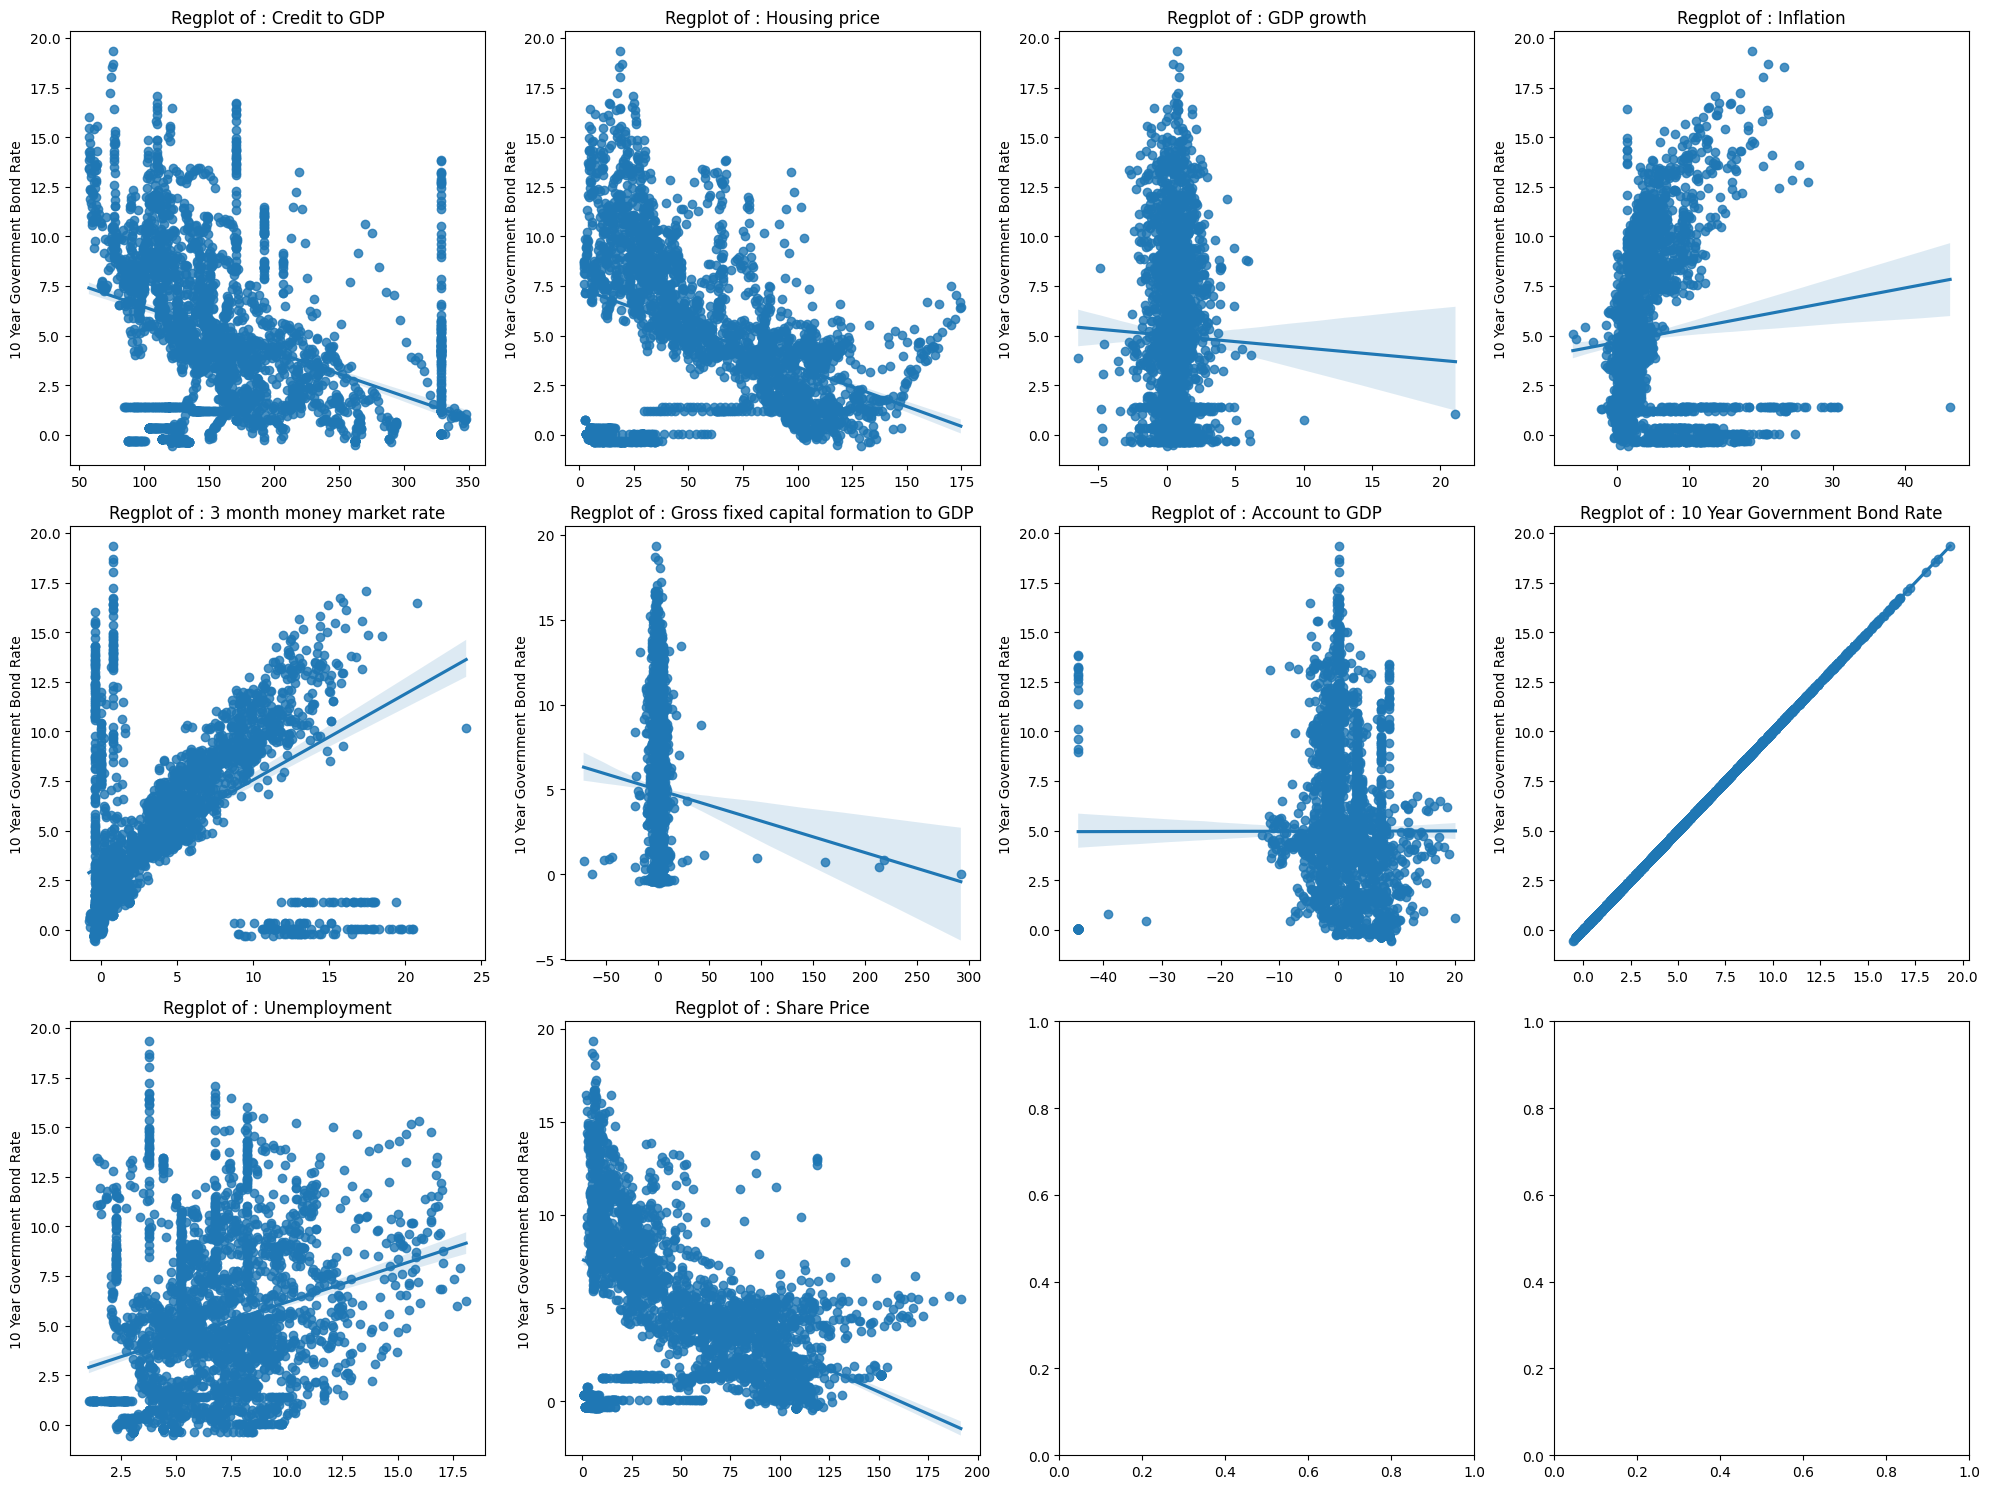

In [42]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))

for i, ax in zip(df.columns[3:], axes.flat):
    sns.regplot(x=df[i], y=df["10 Year Government Bond Rate"], ax=ax)
    ax.set(title=f"Regplot of : {i}", xlabel="")

plt.tight_layout()
plt.show()

<ipython-input-43-7d09e942fadd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


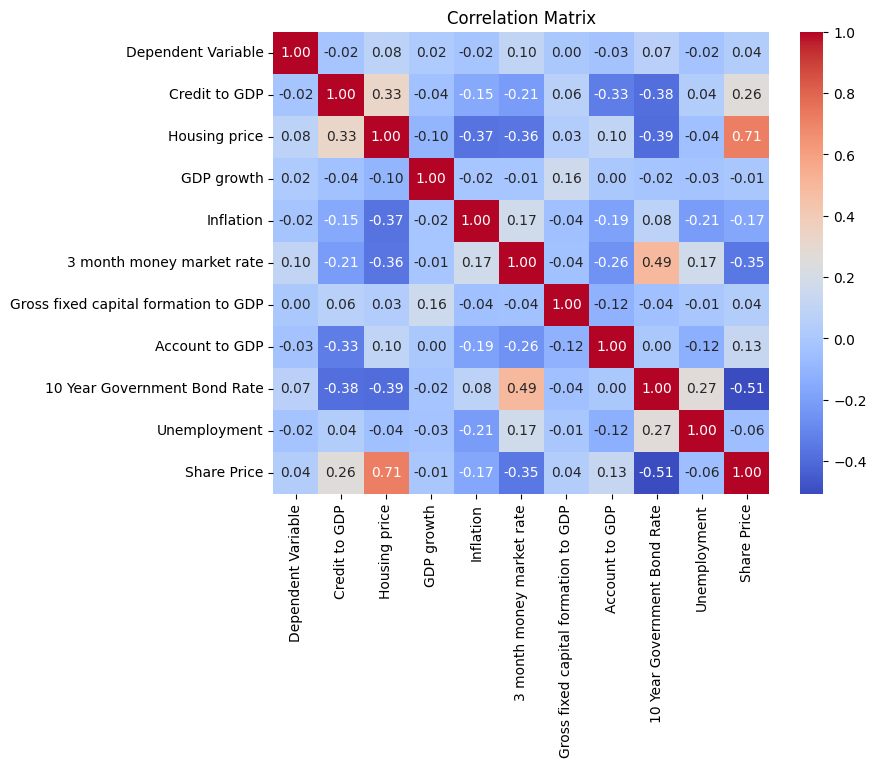

In [43]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
columns_to_normalize = df.columns[3:]
df_subset = df[columns_to_normalize]
scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=columns_to_normalize)
norm_df = pd.concat([df.iloc[:, :3], df_normalized], axis=1)

norm_df

,Country,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,DE,1970-Q1,0,-1.146417,-0.725996,-1.896584,-0.338422,1.190873,-0.296248,-0.231035,0.701649,-0.497536,-1.026028
1,DE,1970-Q2,0,-1.146417,-0.705453,2.870081,-0.247586,1.267644,0.750096,-0.231035,0.840561,-0.497536,-1.050506
2,DE,1970-Q3,0,-1.146417,-0.684571,1.066603,-0.200258,1.154659,0.457819,-0.231035,0.873246,-0.497536,-1.062812
3,DE,1970-Q4,0,-1.146417,-0.663269,0.193748,-0.111013,1.037329,-0.095040,-0.231035,0.865075,-0.497536,-1.072815
4,DE,1971-Q1,0,-1.143544,-0.642302,-2.175014,-0.020294,0.743279,-0.245103,-0.231035,0.685307,-0.497536,-1.052985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,CA,2018-Q4,0,0.729889,1.710129,-0.239790,-0.514966,-0.422221,-0.225041,-0.319119,-0.650360,-0.340747,1.130469
2796,CA,2019-Q1,0,0.741383,1.707554,-0.470882,-0.602144,-0.447116,0.072601,-0.335734,-0.763186,-0.307150,1.229333
2797,CA,2019-Q2,0,0.774426,1.670436,0.313955,-0.491777,-0.477259,-0.091605,-0.134197,-0.822325,-0.385544,1.346048
2798,CA,2019-Q3,0,0.798850,1.711954,-0.211422,-0.534767,-0.481973,0.134101,-0.242581,-0.884535,-0.329548,1.362352


In [45]:
norm_df['Date'] = pd.to_datetime(norm_df['Date'])
norm_df.set_index(['Country', 'Date'], inplace=True)

In [46]:
norm_df

Dependent Variable  Credit to GDP  Housing price  \
Country Date                                                           
DE      1970-01-01                   0      -1.146417      -0.725996   
        1970-04-01                   0      -1.146417      -0.705453   
        1970-07-01                   0      -1.146417      -0.684571   
        1970-10-01                   0      -1.146417      -0.663269   
        1971-01-01                   0      -1.143544      -0.642302   
...                                ...            ...            ...   
CA      2018-10-01                   0       0.729889       1.710129   
        2019-01-01                   0       0.741383       1.707554   
        2019-04-01                   0       0.774426       1.670436   
        2019-07-01                   0       0.798850       1.711954   
        2019-10-01                   0       0.785920       1.780340   

                    GDP growth  Inflation  3 month money market rate  \
Country Date                                                           
DE      1970-01-01   -1.896584  -0.338422                   1.190873   
        1970-04-01    2.870081  -0.247586                   1.267644   
        1970-07-01    1.066603  -0.200258                   1.154659   
        1970-10-01    0.193748  -0.111013                   1.037329   
        1971-01-01   -2.175014  -0.020294                   0.743279   
...                        ...        ...                        ...   
CA      2018-10-01   -0.239790  -0.514966                  -0.422221   
        2019-01-01   -0.470882  -0.602144                  -0.447116   
        2019-04-01    0.313955  -0.491777                  -0.477259   
        2019-07-01   -0.211422  -0.534767                  -0.481973   
        2019-10-01   -0.251768  -0.502805                  -0.475707   

                    Gross fixed capital formation to GDP  Account to GDP  \
Country Date                                                               
DE      1970-01-01                             -0.296248       -0.231035   
        1970-04-01                              0.750096       -0.231035   
        1970-07-01                              0.457819       -0.231035   
        1970-10-01                             -0.095040       -0.231035   
        1971-01-01                             -0.245103       -0.231035   
...                                                  ...             ...   
CA      2018-10-01                             -0.225041       -0.319119   
        2019-01-01                              0.072601       -0.335734   
        2019-04-01                             -0.091605       -0.134197   
        2019-07-01                              0.134101       -0.242581   
        2019-10-01                             -0.178843       -0.167699   

                    10 Year Government Bond Rate  Unemployment  Share Price  
Country Date                                                                 
DE      1970-01-01                      0.701649     -0.497536    -1.026028  
        1970-04-01                      0.840561     -0.497536    -1.050506  
        1970-07-01                      0.873246     -0.497536    -1.062812  
        1970-10-01                      0.865075     -0.497536    -1.072815  
        1971-01-01                      0.685307     -0.497536    -1.052985  
...                                          ...           ...          ...  
CA      2018-10-01                     -0.650360     -0.340747     1.130469  
        2019-01-01                     -0.763186     -0.307150     1.229333  
        2019-04-01                     -0.822325     -0.385544     1.346048  
        2019-07-01                     -0.884535     -0.329548     1.362352  
        2019-10-01                     -0.846520     -0.340747     1.412466  

[2800 rows x 11 columns]

In [47]:
X = norm_df.drop('Dependent Variable', axis=1)
y = norm_df['Dependent Variable']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [49]:
lr = LogisticRegression(random_state=123).fit(X_train, y_train)

In [50]:
feature_names = norm_df.drop('Dependent Variable', axis=1)
coefficients = lr.coef_[0]
std_errors = np.std(X, 0) * np.sqrt((1 -  lr.score(X_train, y_train)) / (lr.score(X_train, y_train) * len(y_train)))

z_scores = coefficients / std_errors

p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

for feature, coef, z, p in zip(feature_names, coefficients, z_scores, p_values):
    print(f"{feature}: Coefficient = {coef:.4f}, Z-score = {z:.4f}, P-value = {p:.4f}")

Credit to GDP: Coefficient = -0.1426, Z-score = -21.9810, P-value = 0.0000
Housing price: Coefficient = 0.5886, Z-score = 90.7279, P-value = 0.0000
GDP growth: Coefficient = 0.1220, Z-score = 18.8009, P-value = 0.0000
Inflation: Coefficient = -0.1103, Z-score = -17.0007, P-value = 0.0000
3 month money market rate: Coefficient = 0.4022, Z-score = 61.9931, P-value = 0.0000
Gross fixed capital formation to GDP: Coefficient = -0.0192, Z-score = -2.9528, P-value = 0.0031
Account to GDP: Coefficient = -0.1883, Z-score = -29.0249, P-value = 0.0000
10 Year Government Bond Rate: Coefficient = 0.3550, Z-score = 54.7234, P-value = 0.0000
Unemployment: Coefficient = -0.2133, Z-score = -32.8815, P-value = 0.0000
Share Price: Coefficient = 0.0688, Z-score = 10.6115, P-value = 0.0000


In [51]:
intercept = lr.intercept_[0]

# Calculate the standard error of the intercept
std_error_intercept = np.sqrt((1 - lr.score(X_train, y_train)) / (lr.score(X_train, y_train) * len(y_train)))

# Calculate the z-score for the intercept
z_score_intercept = intercept / std_error_intercept

# Calculate the two-tailed p-value for the intercept
p_value_intercept = 2 * (1 - norm.cdf(np.abs(z_score_intercept)))

# Print the intercept, z-score, and p-value for the intercept
print(f"Intercept: {intercept:.4f}, Z-score = {z_score_intercept:.4f}, P-value = {p_value_intercept:.4f}")

Intercept: -2.5603, Z-score = -394.6359, P-value = 0.0000


In [52]:
num_folds = 10
y_trainr = np.ravel(y_train)

cross_val_scores = cross_val_score(lr, X_train, y_trainr, cv=num_folds, scoring='accuracy')


for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.4f}")

mean_score = cross_val_scores.mean()
std_deviation = cross_val_scores.std()
print(f"Mean Accuracy: {mean_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")

Fold 1: 0.9152
Fold 2: 0.9152
Fold 3: 0.9152
Fold 4: 0.9152
Fold 5: 0.9152
Fold 6: 0.9152
Fold 7: 0.9152
Fold 8: 0.9107
Fold 9: 0.9107
Fold 10: 0.9062
Mean Accuracy: 0.9134
Standard Deviation: 0.0030


In [53]:
threshold = 0.109
y_probs_lr = lr.predict_proba(X_test)[:, 1]
y_pred_lr = np.where(y_probs_lr >= threshold, 1, 0)

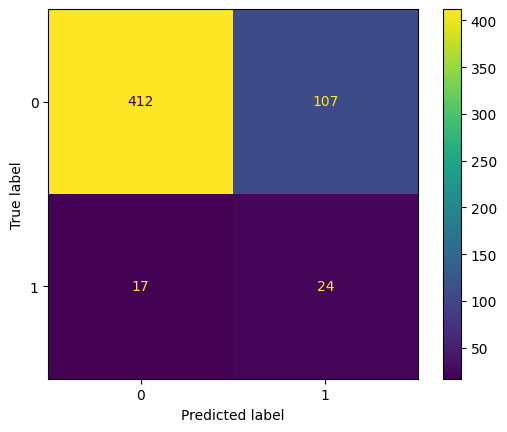

In [54]:
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [55]:
accuracy_score(y_test, y_pred_lr)

0.7785714285714286

In [59]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.09464285714285714
Absolute Usefulness: -0.05071428571428571
Relative Usefulness: -1.1544715447154472


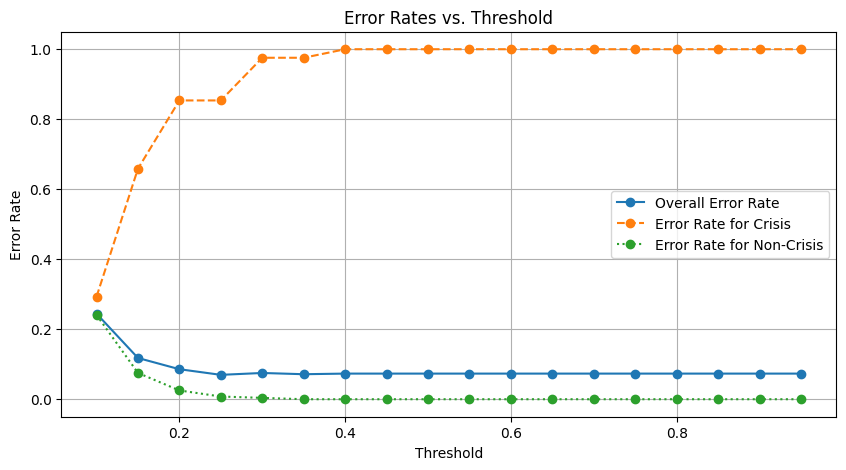

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm

# Train the logistic regression model (replace with your data)
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

## LASSO

In [61]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]  # Adjust the balance between L1 and L2 regularization for Elastic Net
}

# Create a Logistic Regression model
logistic = LogisticRegression(solver='saga', max_iter=1000)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(logistic, param_grid, cv=10, scoring='accuracy', verbose=1)

# Fit the model and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)
print("Best accuracy score for Logistic Regression:", grid_search.best_score_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

Best hyperparameters for Logistic Regression: {'C': 0.001, 'l1_ratio': 0.1, 'penalty': 'l1'}
Best accuracy score for Logistic Regression: 0.9138392857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [62]:
lasso = LogisticRegression(C=0.001, penalty='l1', solver='saga', max_iter=1000, random_state=123)
lasso.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, penalty='l1', random_state=123,
                   solver='saga')

In [63]:
threshold = 0.2
y_probs_lasso = lasso.predict_proba(X_test)[:, 1]
y_pred_lasso = np.where(y_probs_lasso >= threshold, 1, 0)

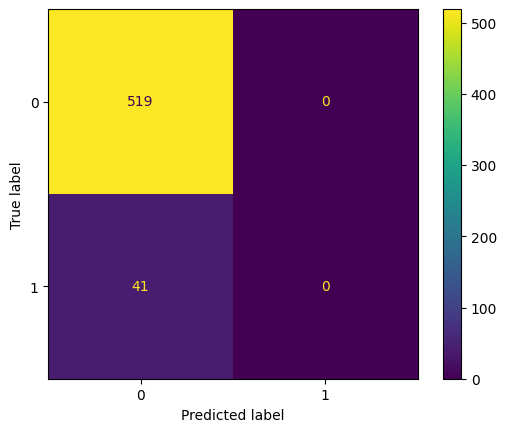

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lasso, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [67]:
accuracy_score(y_test, y_pred_lasso)

0.9267857142857143

In [70]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lasso.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.04392857142857143
Absolute Usefulness: 0.0
Relative Usefulness: 0.0


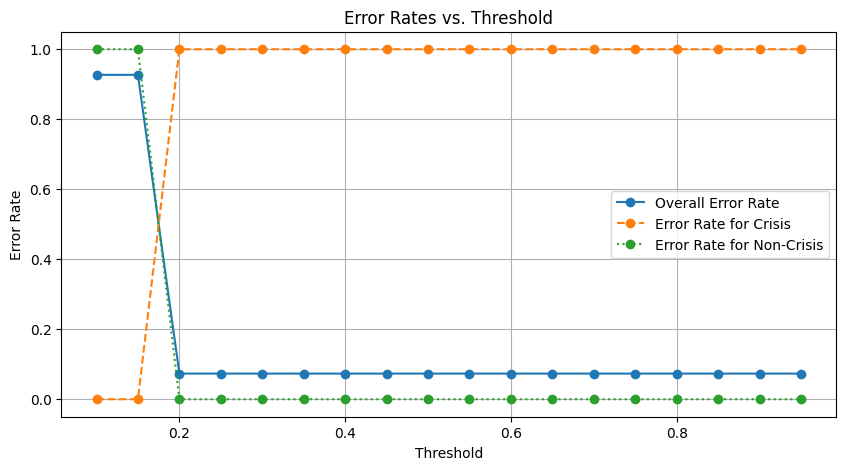

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = lasso  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### KNN

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a GridSearchCV object
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the model to your data (replace X_train and y_train with your data)
knn_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_knn_params = knn_grid.best_params_
best_knn_score = knn_grid.best_score_

print("Best hyperparameters for KNN:", best_knn_params)
print("Best accuracy score for KNN:", best_knn_score)


Best hyperparameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best accuracy score for KNN: 0.9522321428571429


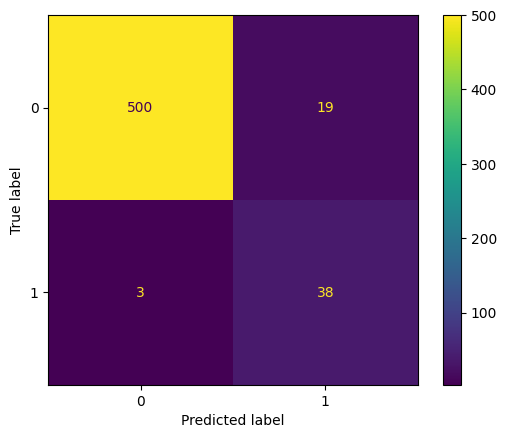

In [99]:
knn = KNeighborsClassifier(n_neighbors= 3, p= 1, weights='distance')
knn.fit(X_train, y_train)

threshold = 0.35
y_probs_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = np.where(y_probs_knn >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [74]:
accuracy_score(y_test, y_pred_knn)

0.9607142857142857

In [76]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_knn.ravel()

# Define mu and class probabilities
mu = 0.7  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.01392857142857143
Absolute Usefulness: 0.03732142857142857
Relative Usefulness: 0.7282229965156795


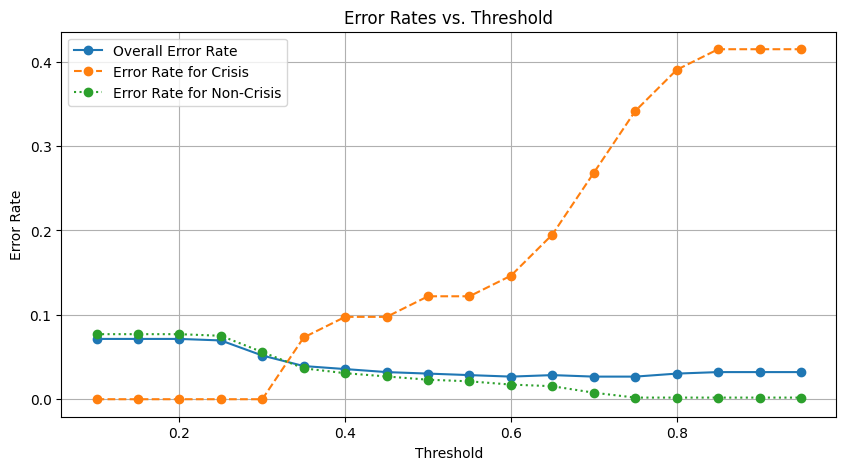

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = knn  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### SVM

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
}

# Create a GridSearchCV object
svm_grid = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')

# Fit the model to your data (replace X_train and y_train with your data)
svm_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_svm_params = svm_grid.best_params_
best_svm_score = svm_grid.best_score_

print("Best hyperparameters for SVM:", best_svm_params)
print("Best accuracy score for SVM:", best_svm_score)


Best hyperparameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy score for SVM: 0.9522321428571429


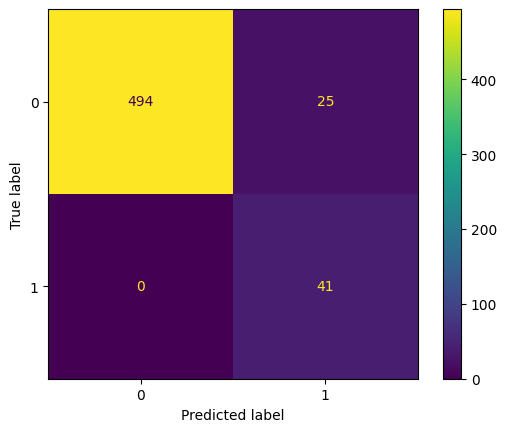

In [97]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma=1, kernel='rbf', probability=True, random_state=123)
svm.fit(X_train, y_train)

threshold = 0.1
y_probs_svm = svm.predict_proba(X_test)[:, 1]
y_pred_svm = np.where(y_probs_svm >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=[0, 1])
cm_display.plot()
plt.show()


In [80]:
accuracy_score(y_test, y_pred_svm)

0.9571428571428572

In [86]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_svm.ravel()

# Define mu and class probabilities
mu = 0.7  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.012857142857142859
Absolute Usefulness: 0.03839285714285714
Relative Usefulness: 0.7491289198606271


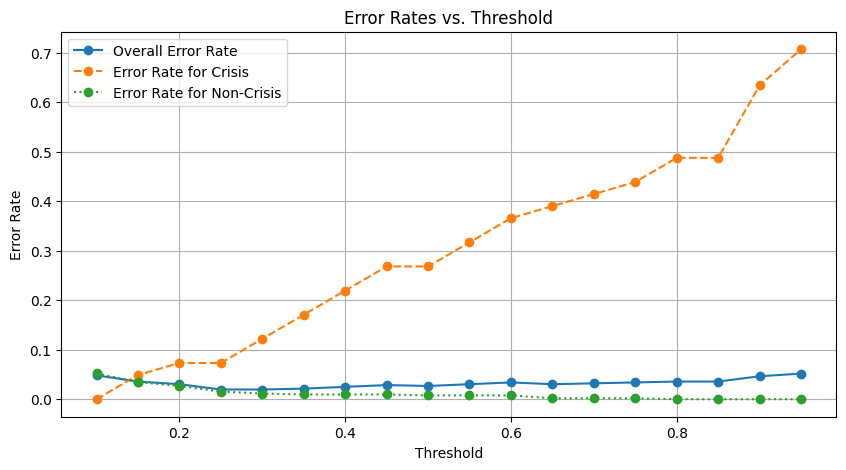

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = svm  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### DECISION TREE

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
dt_grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

# Fit the model to your data (replace X_train and y_train with your data)
dt_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_dt_params = dt_grid.best_params_
best_dt_score = dt_grid.best_score_

print("Best hyperparameters for Decision Tree:", best_dt_params)
print("Best accuracy score for Decision Tree:", best_dt_score)


Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score for Decision Tree: 0.9535714285714285


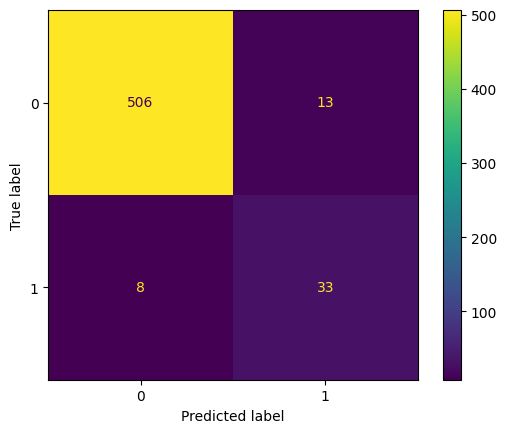

In [96]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= None, min_samples_leaf=1, min_samples_split=2, random_state=123)
dt.fit(X_train, y_train)

threshold = 0.15
y_probs_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt = np.where(y_probs_dt >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [90]:
accuracy_score(y_test, y_pred_dt)

0.9589285714285715

In [92]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_dt.ravel()

# Define mu and class probabilities
mu = 0.7  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.020178571428571428
Absolute Usefulness: 0.03107142857142857
Relative Usefulness: 0.6062717770034843


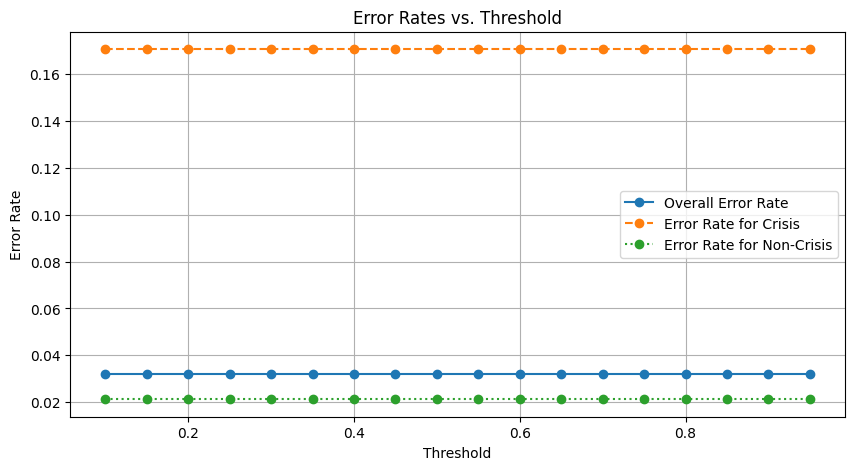

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = dt  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### RANDOM FOREST

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data (replace X_train and y_train with your data)
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_

print("Best hyperparameters for Random Forest:", best_rf_params)
print("Best accuracy score for Random Forest:", best_rf_score)


Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score for Random Forest: 0.9535714285714286


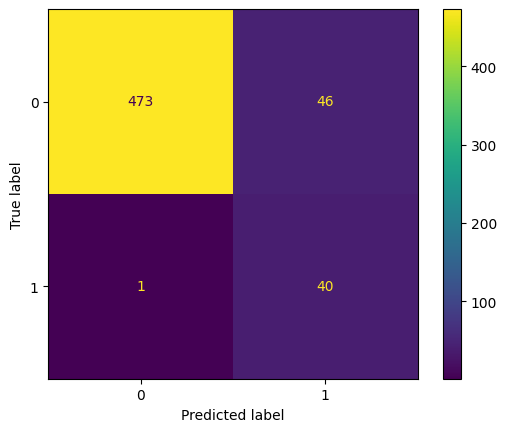

In [95]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=123)
rf.fit(X_train, y_train)

threshold = 0.15
y_probs_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = np.where(y_probs_rf >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [100]:
accuracy_score(y_test, y_pred_rf)

0.9160714285714285

In [102]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_rf.ravel()

# Define mu and class probabilities
mu = 0.8  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.017857142857142856
Absolute Usefulness: 0.040714285714285724
Relative Usefulness: 0.6951219512195123


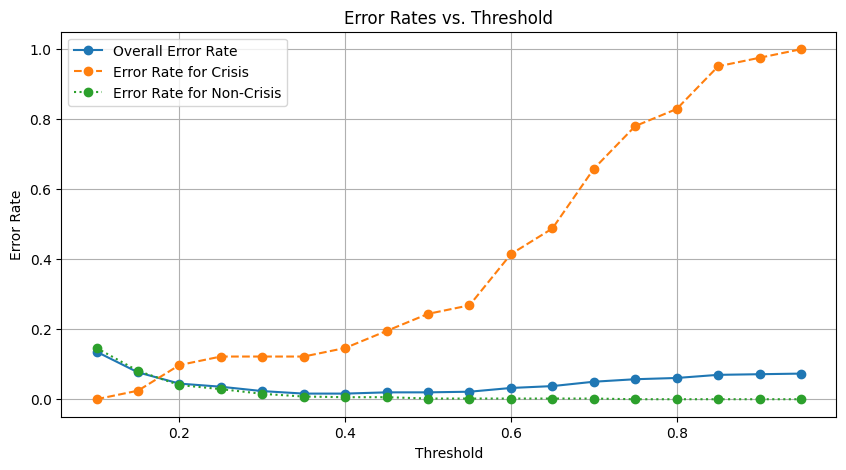

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = rf  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

## Now we add completely external dataset that belongs to Spain, same variables but data completely is different and without any training we have tried to use models that previously trained with first dataset

In [226]:
real = df = pd.read_excel("/content/Spain Data.xlsx")

In [227]:
real

,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,1970-Q1,0,67.0,NaN,1.869665,3.988210,NaN,2.183159,NaN,NaN,NaN,NaN
1,1970-Q2,0,67.3,NaN,0.158864,6.977670,NaN,-1.423215,NaN,NaN,NaN,NaN
2,1970-Q3,0,67.5,NaN,0.511083,7.543043,NaN,-1.630055,NaN,NaN,NaN,NaN
3,1970-Q4,0,69.7,NaN,0.789028,7.714549,NaN,-1.696520,NaN,NaN,NaN,NaN
4,1971-Q1,0,69.9,1.890217,0.780918,9.505738,NaN,-1.942527,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-Q4,0,154.0,121.571122,0.659259,1.136002,-0.315333,0.354355,1.787642,1.527395,14.56667,83.32016
196,2019-Q1,0,154.2,123.222934,0.608862,0.917630,-0.308533,2.588844,1.917317,1.262193,14.23333,84.89809
197,2019-Q2,0,153.0,124.144469,0.346200,0.312410,-0.317100,0.086900,2.407224,0.813794,14.20000,86.76260
198,2019-Q3,0,152.2,125.430464,0.295000,0.440998,-0.396733,1.225761,2.016904,0.226761,14.10000,83.65209


In [228]:
real.ffill(inplace=True)
real.bfill(inplace=True)
real

,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,1970-Q1,0,67.0,1.890217,1.869665,3.988210,13.653670,2.183159,-1.654563,15.540000,20.50000,7.604904
1,1970-Q2,0,67.3,1.890217,0.158864,6.977670,13.653670,-1.423215,-1.654563,15.540000,20.50000,7.604904
2,1970-Q3,0,67.5,1.890217,0.511083,7.543043,13.653670,-1.630055,-1.654563,15.540000,20.50000,7.604904
3,1970-Q4,0,69.7,1.890217,0.789028,7.714549,13.653670,-1.696520,-1.654563,15.540000,20.50000,7.604904
4,1971-Q1,0,69.9,1.890217,0.780918,9.505738,13.653670,-1.942527,-1.654563,15.540000,20.50000,7.604904
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-Q4,0,154.0,121.571122,0.659259,1.136002,-0.315333,0.354355,1.787642,1.527395,14.56667,83.320160
196,2019-Q1,0,154.2,123.222934,0.608862,0.917630,-0.308533,2.588844,1.917317,1.262193,14.23333,84.898090
197,2019-Q2,0,153.0,124.144469,0.346200,0.312410,-0.317100,0.086900,2.407224,0.813794,14.20000,86.762600
198,2019-Q3,0,152.2,125.430464,0.295000,0.440998,-0.396733,1.225761,2.016904,0.226761,14.10000,83.652090


In [229]:
real.describe()

,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.045000,117.361500,56.642272,0.630003,6.595359,8.382111,0.600922,-2.004106,9.352151,17.995000,49.431557
std,0.207824,53.679823,48.214834,0.786116,5.969740,6.443656,2.117741,2.691503,5.457038,4.348784,40.962123
min,0.000000,67.000000,1.827709,-2.600341,-1.068610,-0.402967,-7.803220,-10.098460,0.226761,7.966667,7.469168
25%,0.000000,76.275000,9.010761,0.216308,2.415733,2.140033,-0.578666,-2.580949,4.274397,15.425003,7.604904
50%,0.000000,81.900000,44.044534,0.670749,4.393935,8.856333,0.642034,-1.654563,9.977041,20.283330,28.511140
75%,0.000000,160.800000,101.914457,1.001956,9.480820,13.653670,2.183692,-1.654563,15.540000,20.500000,84.308792
max,1.000000,226.800000,150.465104,3.781683,27.239320,23.988660,5.175069,3.523438,17.813330,26.333330,155.342200


In [230]:
real.isna().sum()

Date                                    0
Dependent Variable                      0
Credit to GDP                           0
Housing price                           0
GDP growth                              0
Inflation                               0
3 month money market rate               0
Gross fixed capital formation to GDP    0
Account to GDP                          0
10 Year Government Bond Rate            0
Unemployment                            0
Share Price                             0
dtype: int64

In [231]:
columns_to_normalize = real.columns[2:]

# Create a subset of the DataFrame with the selected columns
real_subset = real[columns_to_normalize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df_normalized = pd.DataFrame(scaler.fit_transform(real_subset), columns=columns_to_normalize)

# Concatenate the non-normalized columns from the original DataFrame
norm_real = pd.concat([real.iloc[:, :2], df_normalized], axis=1)

norm_real


,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,1970-Q1,0,-0.940537,-1.138435,1.580903,-0.437823,0.820153,0.749009,0.130195,1.136766,0.577469,-1.023668
1,1970-Q2,0,-0.934935,-1.138435,-0.600829,0.064202,0.820153,-0.958199,0.130195,1.136766,0.577469,-1.023668
2,1970-Q3,0,-0.931199,-1.138435,-0.151655,0.159146,0.820153,-1.056114,0.130195,1.136766,0.577469,-1.023668
3,1970-Q4,0,-0.890113,-1.138435,0.202799,0.187948,0.820153,-1.087578,0.130195,1.136766,0.577469,-1.023668
4,1971-Q1,0,-0.886378,-1.138435,0.192457,0.488745,0.820153,-1.204034,0.130195,1.136766,0.577469,-1.023668
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-Q4,0,0.684250,1.350036,0.037309,-0.916800,-1.353156,-0.116721,1.412320,-1.437482,-0.790320,0.829392
196,2019-Q1,0,0.687986,1.384382,-0.026961,-0.953471,-1.352098,0.941055,1.460620,-1.486202,-0.867164,0.868010
197,2019-Q2,0,0.665575,1.403543,-0.361925,-1.055107,-1.353431,-0.243331,1.643097,-1.568577,-0.874848,0.913642
198,2019-Q3,0,0.650634,1.430282,-0.427219,-1.033513,-1.365820,0.295790,1.497714,-1.676420,-0.897900,0.837515


In [232]:
norm_real['Date'] = pd.to_datetime(norm_real['Date'])
norm_real.set_index('Date', inplace=True)

In [233]:
X_test_real = norm_real.drop('Dependent Variable', axis=1)
y_test_real = norm_real['Dependent Variable']

### LOGISTIC REGRESSION (SPAIN)

In [144]:
lr_real = LogisticRegression(random_state=42).fit(X_train, y_train)

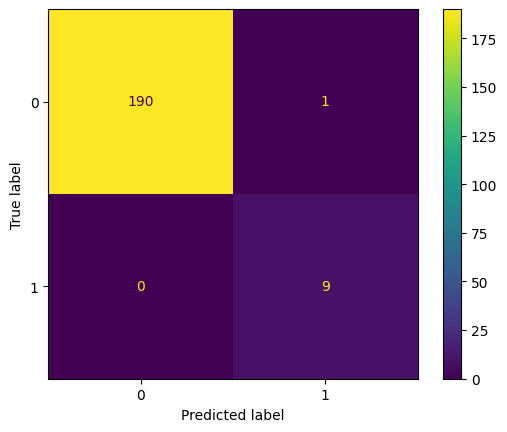

In [145]:
threshold = 0.2
y_probs_lr_real = lr_real.predict_proba(X_test_real)[:, 1]
y_pred_lr_real = np.where(y_probs_lr_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_lr_real = confusion_matrix(y_test_real, y_pred_lr_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [146]:
accuracy_score(y_test_real, y_pred_lr_real)

0.995

In [147]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lr_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.0007142857142857144
Absolute Usefulness: 0.008928571428571428
Relative Usefulness: 0.9259259259259259


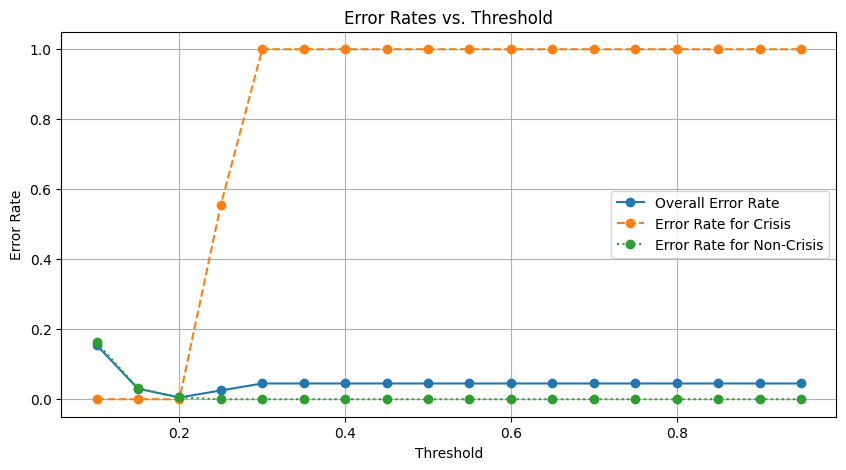

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = lr_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### LASSO (SPAIN)

In [149]:
lasso_real = LogisticRegression(C=0.001, penalty='l1', solver='saga', max_iter=1000, random_state=42)
lasso_real.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

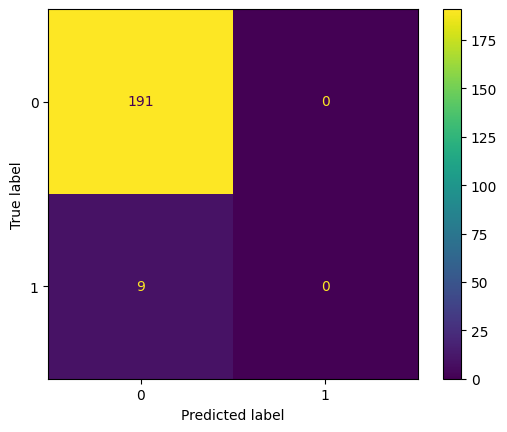

In [150]:
threshold = 0.2
y_probs_lasso_real = lasso_real.predict_proba(X_test_real)[:, 1]
y_pred_lasso_real = np.where(y_probs_lasso_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_lasso_real = confusion_matrix(y_test_real, y_pred_lasso_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lasso_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [151]:
accuracy_score(y_test_real, y_pred_lasso_real)

0.955

In [152]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lasso_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.009642857142857142
Absolute Usefulness: 0.0
Relative Usefulness: 0.0


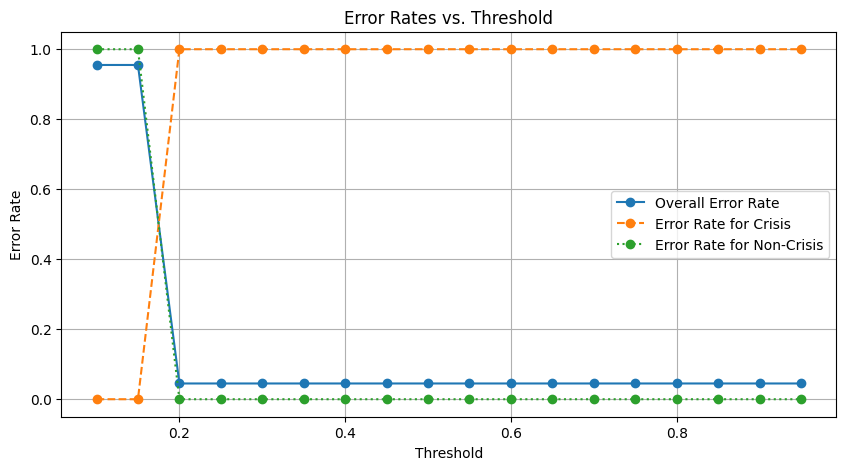

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = lasso_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### KNN (SPAIN)

In [158]:
knn_real = KNeighborsClassifier(n_neighbors= 3, p= 1, weights='distance')
knn_real.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

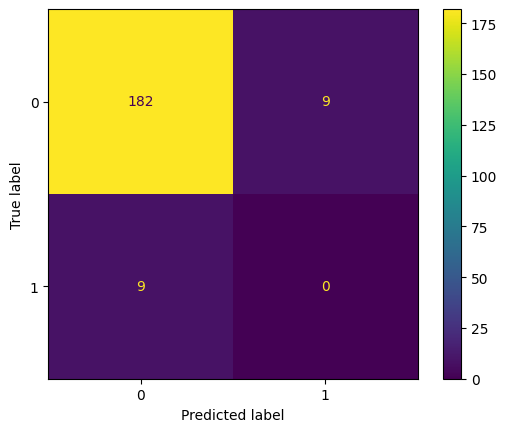

In [159]:
threshold = 0.2
y_probs_knn_real = knn_real.predict_proba(X_test_real)[:, 1]
y_pred_knn_real = np.where(y_probs_knn_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_knn_real = confusion_matrix(y_test_real, y_pred_knn_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [160]:
accuracy_score(y_test_real, y_pred_knn_real)

0.91

In [161]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_knn_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.016071428571428573
Absolute Usefulness: -0.006428571428571431
Relative Usefulness: -0.666666666666667


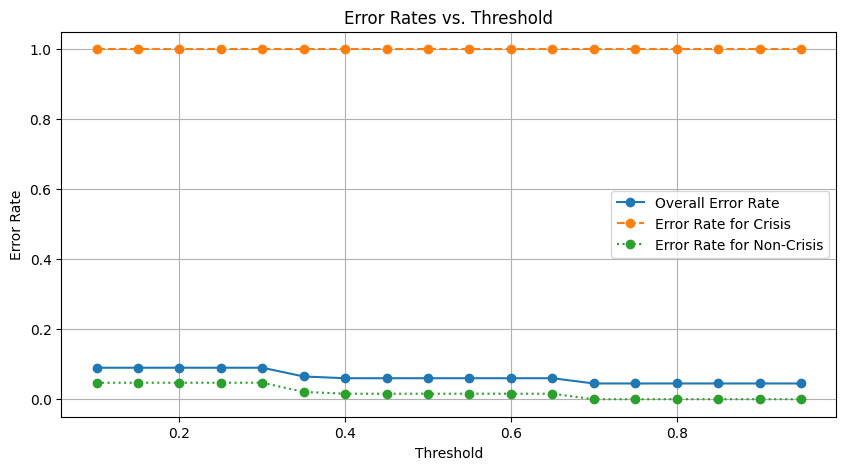

In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = knn_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### SVM (SPAIN)

In [224]:
svm_real = SVC(C=10, gamma=1, kernel='rbf', probability=True, random_state=123)
svm_real.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True, random_state=123)

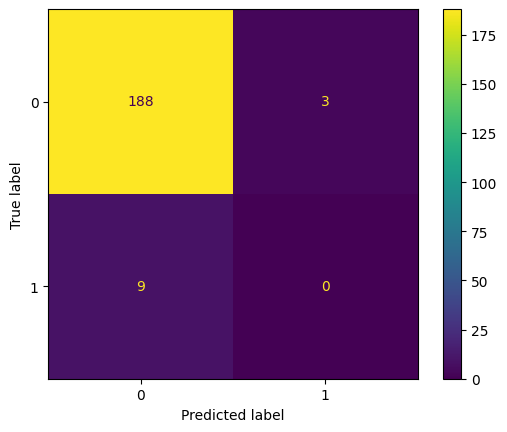

In [235]:
threshold = 0.1
y_probs_svm_real = svm.predict_proba(X_test_real)[:, 1]
y_pred_svm_real = np.where(y_probs_svm_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_svm_real = confusion_matrix(y_test_real, y_pred_svm_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [236]:
accuracy_score(y_test_real, y_pred_svm_real)

0.94

In [237]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_svm_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.011785714285714285
Absolute Usefulness: -0.0021428571428571425
Relative Usefulness: -0.2222222222222222


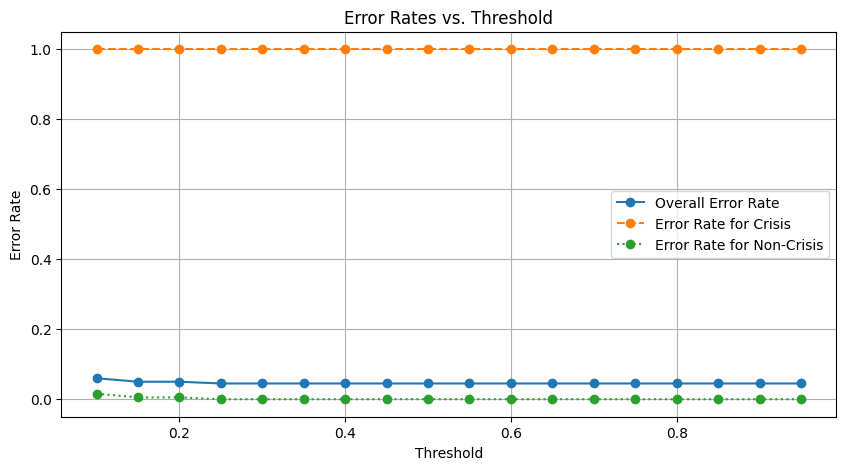

In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = svm_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### DECISION TREE (SPAIN)

In [222]:
dt_real = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_leaf=1,
                            min_samples_split=2, random_state=123)
dt_real.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=123)

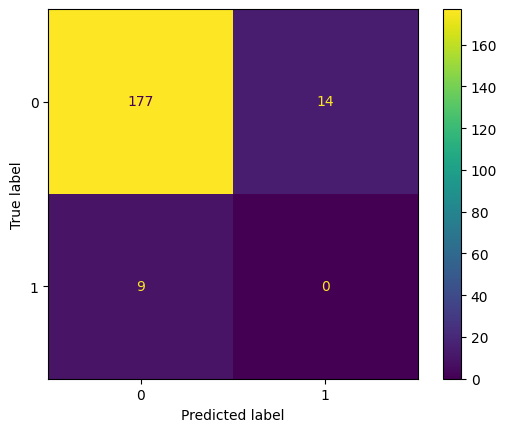

In [223]:
threshold = 0.2
y_probs_dt_real = dt_real.predict_proba(X_test_real)[:, 1]
y_pred_dt_real = np.where(y_probs_dt_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_dt_real = confusion_matrix(y_test_real, y_pred_dt_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [182]:
accuracy_score(y_test_real, y_pred_dt_real)

0.885

In [183]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_dt_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.019642857142857142
Absolute Usefulness: -0.01
Relative Usefulness: -1.0370370370370372


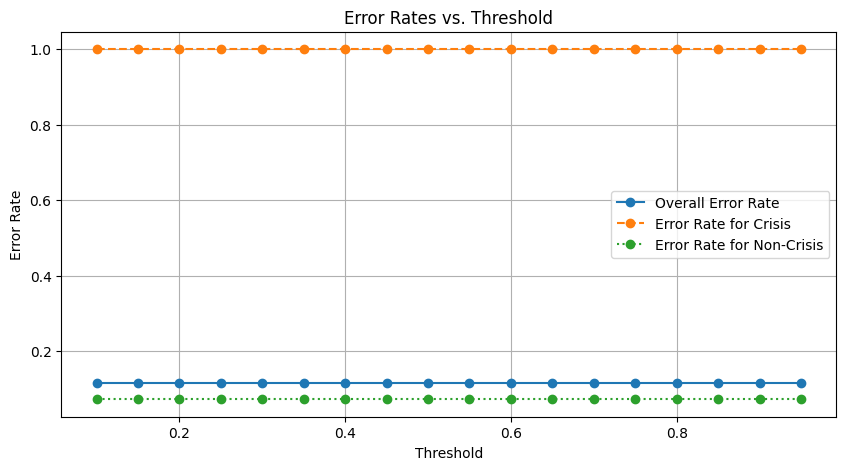

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = dt_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

### RANDOM FOREST (SPAIN)

In [214]:
rf_real = RandomForestClassifier(criterion= 'entropy',
                                 max_depth= 20, min_samples_leaf=1,
                                 min_samples_split=2,
                                 n_estimators=100, random_state=159)
rf_real.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, random_state=159)

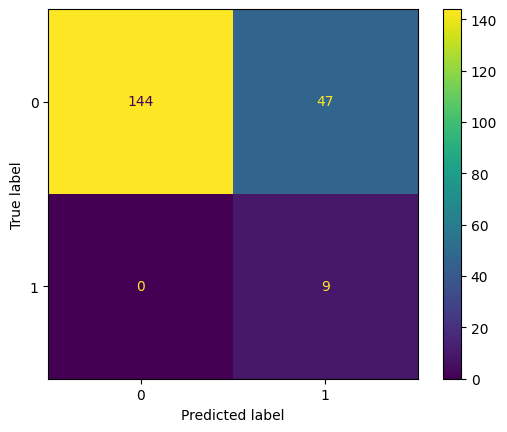

In [215]:
threshold = 0.09
y_probs_rf_real = rf_real.predict_proba(X_test_real)[:, 1]
y_pred_rf_real = np.where(y_probs_rf_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_rf_real = confusion_matrix(y_test_real, y_pred_rf_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [212]:
accuracy_score(y_test_real, y_pred_rf_real)

0.735

In [213]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_rf_real.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.01232142857142857
Absolute Usefulness: 0.0021428571428571425
Relative Usefulness: 0.14814814814814814


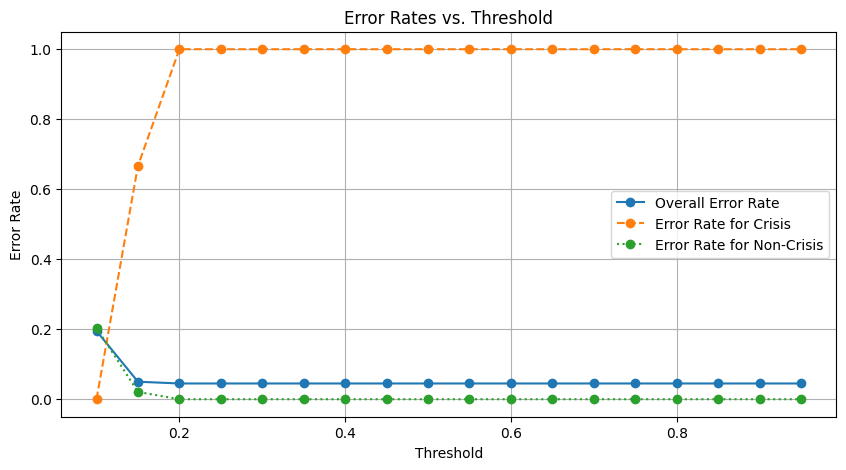

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = rf_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()